# Patterns in the Jeopardy's questions 
Jeopardy is a popular TV show in the US where participants answer questions to win money. It's been running for a few decades, and is a major force in popular culture.

We gonna used a samples of 20K to investigate if there are some patterns that could help us to win when it will our turn to participate to the game. 
the fll data set is available :https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file

solution available:https://github.com/dataquestio/solutions/blob/master/Mission210Solution.ipynb

**The info in the sample dataset:**

- Show Number -- the Jeopardy episode number of the show this question was in.
- Air Date -- the date the episode aired.
- Round -- the round of Jeopardy that the question was asked in. Jeopardy has several rounds as each episode progresses.
- Category -- the category of the question.
- Value -- the number of dollars answering the question correctly is worth.
- Question -- the text of the question.
- Answer -- the text of the answer.

## Exploring the data and cleaning

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
questions=pd.read_csv('jeopardy.csv',infer_datetime_format=True)

In [21]:
#removing the space bedore the columns 
questions.columns = questions.columns.str.replace(' ','') #we let everyting as camel case, I am fine with that

In [22]:
questions.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [23]:
questions.columns

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

## Normalized text

In [24]:
import re

#remove Upper case and punctuation (regex)
def normalize_text(text):
    text = text.lower()
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    return text

#fixing the value col
def normalize_values(text):
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    try:
        text = int(text)
    except Exception:
        text = 0
    return text


In [25]:
#question col
questions['clean_question'] = questions['Question'].apply(normalize_text)

#answer col
questions['clean_answer'] = questions['Answer'].apply(normalize_text)

#value col 
questions['clean_value'] = questions['Value'].apply(normalize_values)

#fix the column AirDate
questions['AirDate'] = pd.to_datetime(questions['AirDate'])

In [26]:
questions.dtypes

ShowNumber                 int64
AirDate           datetime64[ns]
Round                     object
Category                  object
Value                     object
Question                  object
Answer                    object
clean_question            object
clean_answer              object
clean_value                int64
dtype: object

In [27]:
questions.tail()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
19994,3582,2000-03-14,Jeopardy!,U.S. GEOGRAPHY,$200,"Of 8, 12 or 18, the number of U.S. states that...",18,of 8 12 or 18 the number of us states that tou...,18,200
19995,3582,2000-03-14,Jeopardy!,POP MUSIC PAIRINGS,$200,...& the New Power Generation,Prince,the new power generation,prince,200
19996,3582,2000-03-14,Jeopardy!,HISTORIC PEOPLE,$200,In 1589 he was appointed professor of mathemat...,Galileo,in 1589 he was appointed professor of mathemat...,galileo,200
19997,3582,2000-03-14,Jeopardy!,1998 QUOTATIONS,$200,"Before the grand jury she said, ""I'm really so...",Monica Lewinsky,before the grand jury she said im really sorry...,monica lewinsky,200
19998,3582,2000-03-14,Jeopardy!,LLAMA-RAMA,$200,Llamas are the heftiest South American members...,Camels,llamas are the heftiest south american members...,camels,200


## Answers in questions
In order to figure out whether to study past questions, study general knowledge, or not study it all, it would be helpful to figure out two things:

- How often the answer is deducible from the question?
- How often new questions are repeats of older questions?

In the following we gonna write a function that will look if the answer is in the question.

In [28]:
def answer_in_question(row):
    row = row.str.split(" ")
    split_question = row[0]
    split_answer=row[1]
    
    match_count=0
    if 'the' in split_answer:
        split_answer.remove('the')
    #empty answer
    if len(split_answer)==0:
        return 0
    for word in split_answer:
        if word in split_question:
            match_count += 1
    return match_count  / len(split_answer)

In [29]:
questions['answer_in_question']= questions[['clean_question','clean_answer']].apply(answer_in_question,axis=1)

In [30]:
questions['answer_in_question'].value_counts()

0.000000    17375
0.500000     1452
0.333333      551
0.250000      170
1.000000      123
0.666667      103
0.200000       82
0.166667       28
0.400000       28
0.142857       20
0.750000       18
0.285714       10
0.600000        9
0.125000        9
0.428571        3
0.181818        2
0.800000        2
0.571429        2
0.300000        2
0.111111        2
0.307692        1
0.444444        1
0.222222        1
0.375000        1
0.100000        1
0.153846        1
0.875000        1
0.272727        1
Name: answer_in_question, dtype: int64

In [31]:
questions['answer_in_question'].mean()

0.06049325706933587

As we see with the 2 blocs above, the answer or part of it appears in the questions only for 6% of the the 20k questions. so good luck if you hope to win just for that, still 6% increase chances to win .... 

## Recycled questions

In [32]:
#sort in ascending chronological order
questions = questions.sort_values('AirDate')

In [33]:
def question_recycling(row):
    split_question = row.split(' ')
    question_overlap=0
    match_count=0
    long_enough_words=[]
    #creation of a list with the 'complex' hard
    for word in split_question:
        if len(word)>5:
            long_enough_words.append(word)
    
    for word in long_enough_words:
        if word in vocabulary_questions:
            match_count += 1
        if word not in vocabulary_questions:
            vocabulary_questions.add(word)
    if len(long_enough_words) >0:
               question_overlap = match_count / len(long_enough_words)
    return question_overlap

In [34]:
vocabulary_questions=set()
questions['question_overlap']= questions['clean_question'].apply(question_recycling)


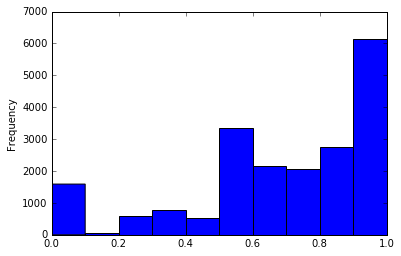

In [35]:
questions['question_overlap'].plot.hist()

In [36]:
questions['question_overlap'].mean()

0.6894031359073245

There is about 70% overlap between terms in new questions and terms in old questions. This only looks at a small set of questions, and it doesn't look at phrases, it looks at single terms. This makes it relatively insignificant, but it does mean that it's worth looking more into the recycling of questions.

## Low value vs high value questions
We are wondering that we want to study only the questions that have a hih values to maximise our wining when we will be on air ! 

With a chi-squared test we can figure out which terms corresponding to high-value questions.

the strategy:
- we already build a vocabulary list of complicated terms employed, 
    - we take a sample of 10 words from this list
- questions will be labeled a high or low value 
    - we count how many time the 10 words are used in the high and low value questions

        **=> this gets us the observed values**

In [43]:
print(questions[questions['clean_value']<800].shape[0]/len(questions))
print(questions[questions['clean_value']==800].count()[0]/len(questions))
print(questions[questions['clean_value']>800].count()[0]/len(questions))

0.5642782139106955
0.1490074503725186
0.28671433571678584


if we consider 800 at our split value, there are 56% of the questions below 800$, 15% at 800 and 28% considered as high values questions.

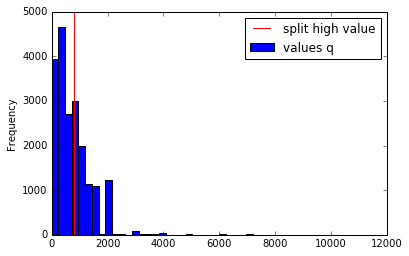

In [69]:
questions['clean_value'].plot.hist(bins=50,label='values q')
plt.axvline(800,color='red',label='split high value')
plt.legend()

=>let's labeled the questions as high value (>800)

In [99]:
#labeling high value q
questions['high'] = questions['clean_value'].apply(lambda x: 1 if (x > 800) else 0)

the following questions help to count how many times a word was used in high and low value questions
it helps to have the expected value for the chi-sqare

In [126]:
def counting_use(word):
    low_count=0
    high_count=0
    for i, row in questions.iterrows():
        split_question=row['clean_question'].split()
        high_value = row['high']
        if word in split_question:
            if high_value == 1:
                high_count += 1
            else:
                low_count += 1

    return high_count, low_count


we might wonder, what words to use, we defined earlier a list of unique terms ( and 'complicated' with len >5) we gonna see if they can be associated with high value questions

In [143]:
#get 10 words from our vocabulary db

import random
comparison_terms = random.sample(vocabulary_questions, 10)

observed_values=[]

for term in comparison_terms:
    #do not fogrget the function return high value and low value counts in that order
    counts=counting_use(term)
    print(counts)
    observed_values.append(counts)

(0, 2)
(0, 1)
(0, 1)
(0, 1)
(2, 1)
(0, 1)
(0, 2)
(2, 2)
(1, 0)
(1, 4)


##  Applyin the chi-squared test
We computed our observed counts above, in the next blocs we gonna compute the expected counts
by calculating the expecting proportion we should have for a given word

In [159]:
import numpy as np
from scipy.stats import chisquare

high_value_count= questions[questions['high']==1]['high'].count()
low_value_count = questions[questions['high']==0]['high'].count()

chi_squared=[]
test=[]
#computing the expected value
lenght_set=len(questions)
for i in observed_values:
    total=sum(i)
    total_prop = total / lenght_set
    
    expected_high_value_count = total_prop * high_value_count
    expected_low_value_count = total_prop * low_value_count
    
    oberved_values=np.array([i[0],i[1]])
    expected_values=np.array([expected_high_value_count,expected_low_value_count])
    
    print(oberved_values,'vs',expected_values)
    
    chi_squared.append(chisquare(oberved_values,expected_values))
    
    print('value_test:',chi_squared_value,'p_value:',p_value)
    print('-----')


[0 2] vs [0.57342867 1.42657133]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[0 1] vs [0.28671434 0.71328566]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[0 1] vs [0.28671434 0.71328566]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[0 1] vs [0.28671434 0.71328566]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[2 1] vs [0.86014301 2.13985699]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[0 1] vs [0.28671434 0.71328566]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[0 2] vs [0.57342867 1.42657133]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[2 2] vs [1.14685734 2.85314266]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[1 0] vs [0.28671434 0.71328566]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----
[1 4] vs [1.43357168 3.56642832]
value_test: 0.18383953104516373 p_value: 0.6680941623250602
-----


In [156]:
chi_squared

[[0.803925692253768, 0.3699222378079571],
 [0.401962846126884, 0.5260772985705469],
 [0.401962846126884, 0.5260772985705469],
 [0.401962846126884, 0.5260772985705469],
 [2.1177104383031944, 0.14560406868264344],
 [0.401962846126884, 0.5260772985705469],
 [0.803925692253768, 0.3699222378079571],
 [0.889754963322559, 0.3455437191483468],
 [2.487792117195675, 0.11473257634454047],
 [0.18383953104516373, 0.6680941623250602]]

The p_value for the Chi-squared are all quite high so there are no statistically significants difference in term of usage of the selected term between high and low value questions. 
But the frequencies were all lower than 5, so the chi-squared test isn't as valid. It would be better to run this test with only terms that have higher frequencies.

## Going further

- Find a better way to eliminate non-informative words than just removing words that are less than 6 characters long. Some ideas:
    - Manually create a list of words to remove, like the, than, etc.
    - Find a list of stopwords to remove.
    - Remove words that occur in more than a certain percentage (like 5%) of questions.
- Perform the chi-squared test across more terms to see what terms have larger differences. This is hard to do currently because the code is slow, but here are some ideas:
    - Use the apply method to make the code that calculates frequencies more efficient.
    - Only select terms that have high frequencies across the dataset, and ignore the others.
- Look more into the Category column and see if any interesting analysis can be done with it. Some ideas:
    - See which categories appear the most often.
    - Find the probability of each category appearing in each round.
- Use the whole Jeopardy dataset (available here) instead of the subset we used in this mission.
- Use phrases instead of single words when seeing if there's overlap between questions. Single words don't capture the whole context of the question well.